# SIR Model

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
from inference_model import InferenceModel
from sir_model import ProximityModel
from ipywidgets import interact, IntSlider

The EpidemicModel class implements the base model. Its method `time_evolution` runs the simulation
for given 
- recover_probas = $\mu_i(t)$ 
- transmissions = $\{i , j, \lambda_{ij}(t)\}$ (for i and j in contact at $t$)

The ProximityModel class corresponds to a simple model where
- recover_probas = $\mu$ is constant
- transmission rate = $\lambda$ is constant
- the contact network changes at each time step
- proba of contact = $\exp(-d(i,j)/s)$

# Sanity check starting with equal partition of the population

In [12]:
#starts simulations with approximatelly the same number of inidividuals in each state
def generate_ground_truth(N):
    states=np.zeros(N)
    nb=np.zeros(3)
    frac=float(N)/3.0
    frac=int(frac)
    states[N-frac:]=2*np.ones(frac)
    states[N-2*frac-1:N-frac-1]=np.ones(frac)
    np.random.shuffle(states)
    return states

In [13]:
N=200
ground_truth=generate_ground_truth(N)

In [14]:
model = ProximityModel(N=N, scale=1.2, mu=0.01, lamb=0.02 ,initial_states=ground_truth)

print("expected number of contacts %.1f" % model.n_contacts)

expected number of contacts 7.5


In [5]:
model.run(500)

Generating transmissions
Running simulation
t = 0 / 500
t = 10 / 500
t = 20 / 500
t = 30 / 500
t = 40 / 500
t = 50 / 500
t = 60 / 500
t = 70 / 500
t = 80 / 500
t = 90 / 500
t = 100 / 500
t = 110 / 500
t = 120 / 500
t = 130 / 500
t = 140 / 500
t = 150 / 500
t = 160 / 500
t = 170 / 500
t = 180 / 500
t = 190 / 500
t = 200 / 500
t = 210 / 500
t = 220 / 500
t = 230 / 500
t = 240 / 500
t = 250 / 500
t = 260 / 500
t = 270 / 500
t = 280 / 500
t = 290 / 500
t = 300 / 500
t = 310 / 500
t = 320 / 500
t = 330 / 500
t = 340 / 500
t = 350 / 500
t = 360 / 500
t = 370 / 500
t = 380 / 500
t = 390 / 500
t = 400 / 500
t = 410 / 500
t = 420 / 500
t = 430 / 500
t = 440 / 500
t = 450 / 500
t = 460 / 500
t = 470 / 500
t = 480 / 500
t = 490 / 500


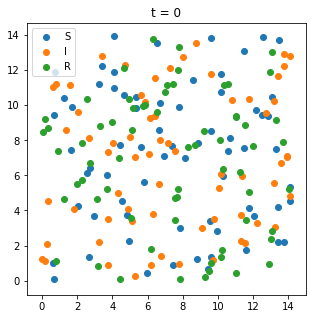

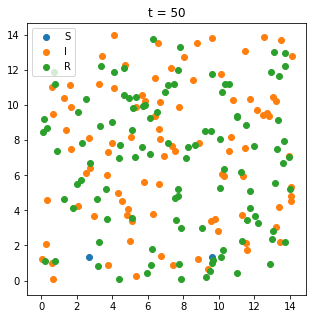

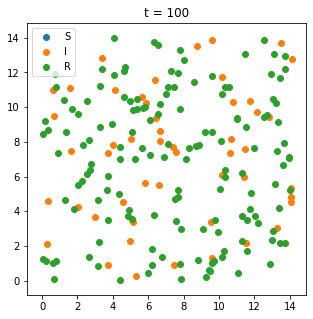

In [6]:
model.plot(t=0)
model.plot(t=50)
model.plot(t=100)

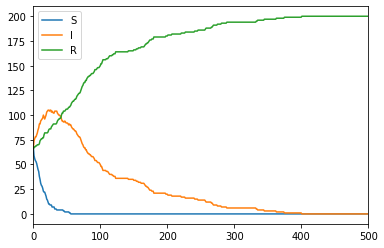

In [7]:
counts = model.get_counts()
counts.plot();

# Inference

In [8]:
from sir_inference.inference_model import InferenceModel

The probas of M observed individuals are set to be $P_S^i(0)=\delta(S-s_m[i])$ where $s_m[i]$ is the state of individual $i$ in the real world simulations

In [ ]:
def generate_initial_probas(M, states):
    freqs = [np.mean(states==s) for s in [0,1,2]]
    print("freqs = ", freqs)
    N = len(states)
    initial_probas = np.broadcast_to(freqs, (N, 3)).copy()
    observations = np.random.choice(N, M, replace=False)
    for i in observations:
        s = int(states[i])
        initial_probas[i] = np.zeros(3)
        initial_probas[i, s] = 1.
    return initial_probas

In order to make some sanity check, here we run a simulation where all the population is observed (the state is deterministic) and check that the predicted probas stay close to the reality for a considerable length of time

In [9]:
# we observe the whole population persons at time t_obs=0
t_obs = 0
initial_probas = generate_initial_probas(M=N, states=model.states[t_obs])
infer = InferenceModel(initial_probas, model.x_pos, model.y_pos)

freqs =  [0.34, 0.33, 0.33]


In [10]:
infer.time_evolution(model.recover_probas, model.transmissions[t_obs:])

t = 0 / 500
t = 10 / 500
t = 20 / 500
t = 30 / 500
t = 40 / 500
t = 50 / 500
t = 60 / 500
t = 70 / 500
t = 80 / 500
t = 90 / 500
t = 100 / 500
t = 110 / 500
t = 120 / 500
t = 130 / 500
t = 140 / 500
t = 150 / 500
t = 160 / 500
t = 170 / 500
t = 180 / 500
t = 190 / 500
t = 200 / 500
t = 210 / 500
t = 220 / 500
t = 230 / 500
t = 240 / 500
t = 250 / 500
t = 260 / 500
t = 270 / 500
t = 280 / 500
t = 290 / 500
t = 300 / 500
t = 310 / 500
t = 320 / 500
t = 330 / 500
t = 340 / 500
t = 350 / 500
t = 360 / 500
t = 370 / 500
t = 380 / 500
t = 390 / 500
t = 400 / 500
t = 410 / 500
t = 420 / 500
t = 430 / 500
t = 440 / 500
t = 450 / 500
t = 460 / 500
t = 470 / 500
t = 480 / 500
t = 490 / 500


In [11]:
interact(infer.plot_probas, t=IntSlider(min=0, max=30));

interactive(children=(IntSlider(value=0, description='t', max=30), Output()), _dom_classes=('widget-interact',…

# Comparing number of S, I or R people 

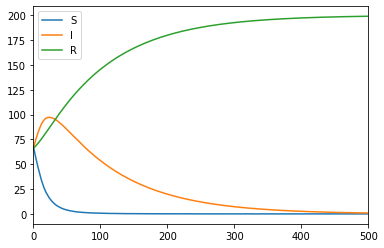

In [14]:
# as estimated by the inference
counts_est = infer.get_counts()
counts_est.index += t_obs
counts_est.plot();

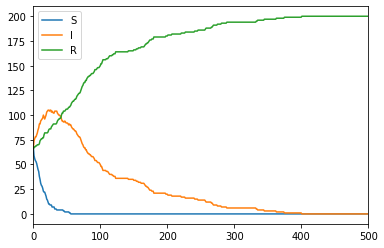

In [15]:
# actual
counts[t_obs:].plot();

# Compare probas

Simply gives the probability of a given individual to be in the correct state

In [43]:
def compare_probas(t):
    "Here t = infer time, model time = t + t_obs "
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    for s, state in enumerate("SIR"):
        ind = np.where(model.states[t+t_obs]==s)[0]
        nb=len(model.states[t+t_obs]==s)
        vals=np.sort(infer.probas[t,ind,s])
        ax[s].scatter(ind,vals,marker='+')
        ax[s].set_xlabel("individual number")
        ax[s].set_ylabel("probability to be in state")
        
        #ax[s].hist(infer.probas[t,ind,s], label=state, bins=20)
        #ax[s].set_xlim(-0.1,1.1)
    ax[s].legend()

In [44]:
interact(compare_probas, t=IntSlider(min=0, max=100));

interactive(children=(IntSlider(value=0, description='t'), Output()), _dom_classes=('widget-interact',))

This is a routine that creates a 2D plot in which each individual occupies an (x,y) position at random. The colors of the dots indicate the probability of the individual to be in state S (respectively I and R). The red crosses correspond to the individuals that are in the same state given by model. 

In [45]:
t_obs =0
t_fin=500
def compare_individuals(t):
    #marke in the scatter plot, the individuals that are really in that state by a red cross
    fig,ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
    for s, state in enumerate("SIR"):
        ind = np.where(model.states[t+t_obs] == s)[0]
        #im=ax.scatter(infer.x_pos, infer.y_pos, c=infer.probas[t, :, s])
        im=ax[s].scatter(infer.x_pos, infer.y_pos, c=infer.probas[t, :, s],
                       cmap="Blues", vmin=0, vmax=1)
        ax[s].scatter(np.take(infer.x_pos,ind), np.take(infer.y_pos,ind),marker='+', vmin=0, vmax=1,color="Red")
        ax[s].set(title=state)
    fig.subplots_adjust(top=0.9)
    fig.suptitle("t="+str(t),fontsize=16)
    fig.colorbar(im)
    fig.tight_layout()
interact(compare_individuals, t=IntSlider(min=t_obs, max=50))

interactive(children=(IntSlider(value=0, description='t', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.compare_individuals(t)>

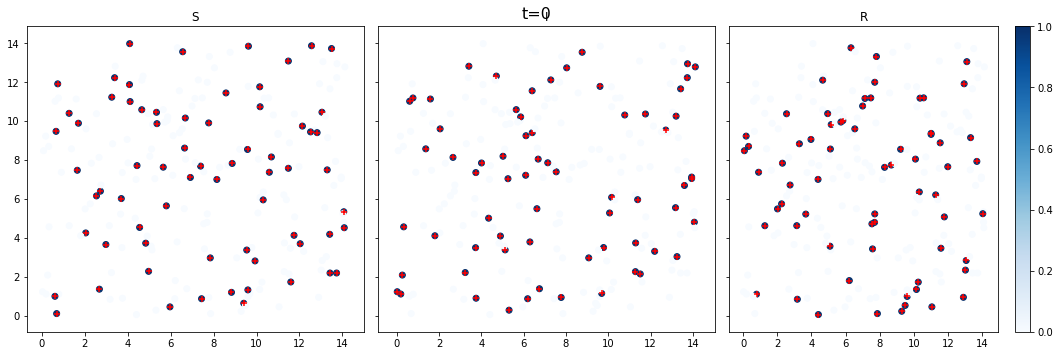

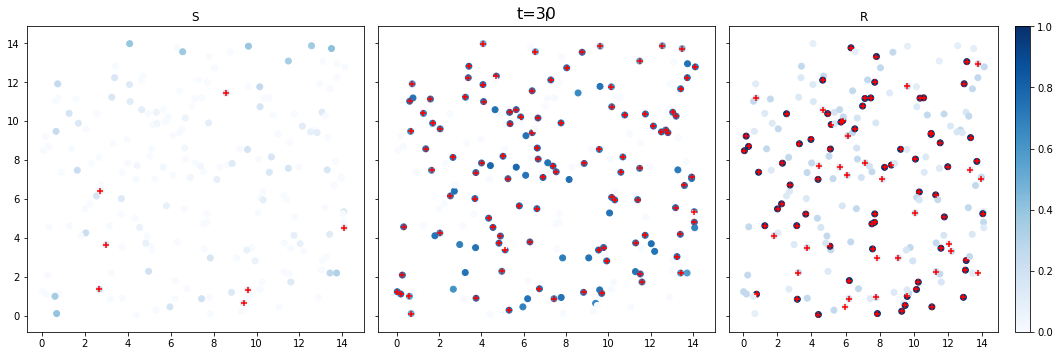

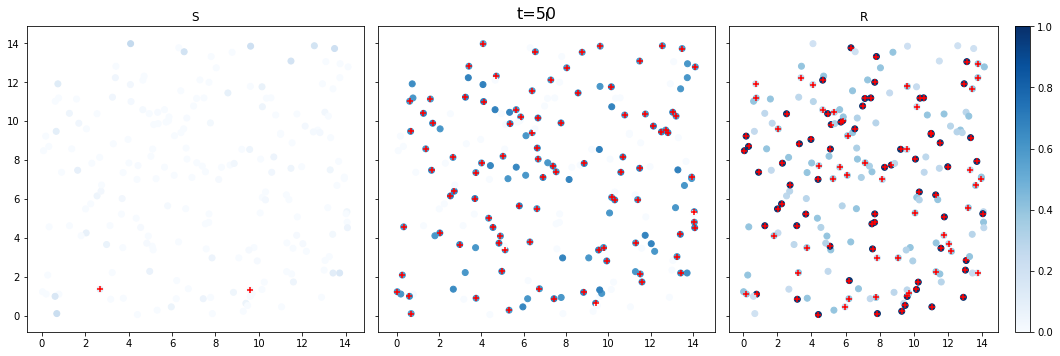

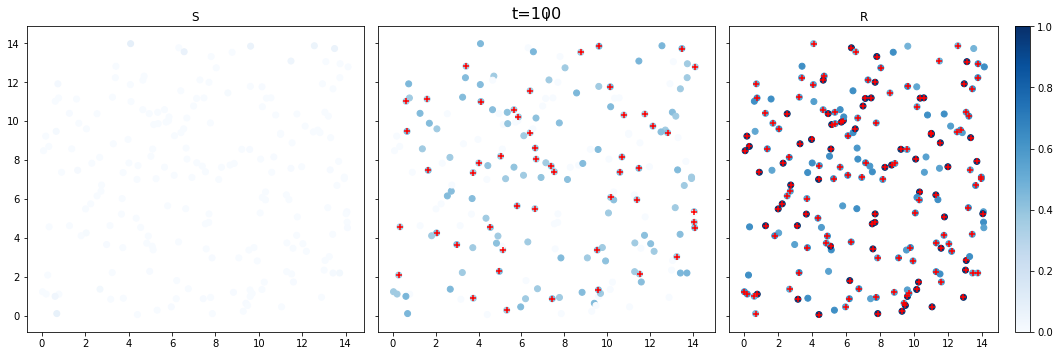

In [26]:
compare_individuals(0)
compare_individuals(30)
compare_individuals(50)
compare_individuals(100)

In [ ]:
t_obs =0
t_fin=500
def false_positive(bench_mark):
    #sees how many individuals have a high proba to be infected according to infer and how many of them trully are infected
    fig,ax = plt.subplots(1,1,figsize=(15,5),sharey=True)
    for t in range(0,t_fin):
        ind = np.where(model.states[t+t_obs] == s)[0]
        #im=ax.scatter(infer.x_pos, infer.y_pos, c=infer.probas[t, :, s])
        im=ax[s].scatter(infer.x_pos, infer.y_pos, c=infer.probas[t, :, s],
                       cmap="Blues", vmin=0, vmax=1)
        ax[s].scatter(np.take(infer.x_pos,ind), np.take(infer.y_pos,ind),marker='+', vmin=0, vmax=1,color="Red")
        ax[s].set(title=state)
    fig.subplots_adjust(top=0.9)
    fig.suptitle("t="+str(t),fontsize=16)
    fig.colorbar(im)
    fig.tight_layout()
interact(compare_individuals, t=IntSlider(min=t_obs, max=50))